In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 500)

In [2]:
# csv_file = '311_Service_Requests_from_2010_to_Present.csv'

In [3]:
# iter_csv = pd.read_csv(csv_file, iterator=True, chunksize=1000, parse_dates=['Created Date'])
# df = pd.concat([chunk[chunk['Created Date'].dt.year == 2017] for chunk in iter_csv])
# df.to_csv('2017_data.csv')

In [4]:
# df.shape

In [5]:
df = pd.read_csv('2017_data.csv')

/Users/sean/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,18,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.shape[0]

2445422

In [7]:
df.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1',
       'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2',
       'Address Type', 'City', 'Landmark', 'Facility Type', 'Status',
       'Due Date', 'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [8]:
df.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,3982410,34708823,2017-01-03 08:49:00,04/12/2017 12:00:00 PM,DSNY,Lot Cleaning,Vacant Lot,8 Request to Clean Vacant Lot,Lot,11238.0,NaN,NaN,NaN,NaN,PROSPECT PLACE,WASHINGTON AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Sanitation has investigated ...,04/12/2017 12:00:00 PM,08 BROOKLYN,NaN,BROOKLYN,994366.0,185763.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676548,-73.963530,"(40.67654750057022, -73.96352995988079)"
1,4148622,34912416,2017-01-03 09:12:00,02/02/2017 12:00:00 PM,DSNY,Lot Cleaning,Vacant Lot,8 Request to Clean Vacant Lot,Lot,11211.0,NaN,NaN,NaN,NaN,NORTH 8 STREET,DRIGGS AVENUE,INTERSECTION,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Sanitation investigated this...,02/02/2017 12:00:00 PM,01 BROOKLYN,NaN,BROOKLYN,996490.0,200716.0,PHONE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.717587,-73.955845,"(40.71758731876742, -73.95584537725969)"
2,4303431,35108046,2017-03-30 07:03:00,03/30/2017 12:00:00 PM,DSNY,Lot Cleaning,Vacant Lot,8 Request to Clean Vacant Lot,Lot,11211.0,156 HOPE STREET,HOPE STREET,KEAP STREET,BEND,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Sanitation has investigated ...,03/30/2017 12:00:00 PM,01 BROOKLYN,3.023870e+09,BROOKLYN,997496.0,198631.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711863,-73.952220,"(40.71186304379185, -73.9522204322487)"
3,4309467,35117399,2017-02-21 10:49:00,04/19/2017 12:00:00 PM,DSNY,Lot Cleaning,Vacant Lot,8 Request to Clean Vacant Lot,Lot,10305.0,36 OLYMPIA BOULEVARD,OLYMPIA BOULEVARD,PIAVE AVENUE,BALFOUR STREET,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Closed,NaN,The Department of Sanitation cleaned the locat...,04/19/2017 12:00:00 PM,02 STATEN ISLAND,5.034010e+09,STATEN ISLAND,964947.0,155255.0,ONLINE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.592794,-74.069504,"(40.59279428994732, -74.0695035852305)"
4,4312892,35123353,2017-02-06 11:47:00,03/10/2017 12:00:00 PM,DSNY,Lot Cleaning,Vacant Lot,8 Request to Clean Vacant Lot,Lot,11208.0,115 SHERIDAN AVENUE,SHERIDAN AVENUE,MC KINLEY AVENUE,LIBERTY AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaN,The Department of Sanitation has investigated ...,03/10/2017 12:00:00 PM,05 BROOKLYN,3.041820e+09,BROOKLYN,1021035.0,186952.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679740,-73.867377,"(40.67974038452862, -73.86737691477967)"


In [9]:
# df.isnull().sum()

In [10]:
# remove whitespaces and capitalization from column names
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [11]:
# df.columns

In [12]:
# df.isnull().sum() > 2400000

In [13]:
df.drop(['unnamed:_0', 'unique_key', 'created_date', 'closed_date', 'open_data_channel_type', 'resolution_description', 'latitude', 'longitude',
         'landmark', 
         'vehicle_type', 
         'taxi_company_borough', 
         'taxi_pick_up_location', 
         'bridge_highway_name', 
         'bridge_highway_direction', 
         'road_ramp', 
         'bridge_highway_segment'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445422 entries, 0 to 2445421
Data columns (total 26 columns):
agency                            object
agency_name                       object
complaint_type                    object
descriptor                        object
location_type                     object
incident_zip                      object
incident_address                  object
street_name                       object
cross_street_1                    object
cross_street_2                    object
intersection_street_1             object
intersection_street_2             object
address_type                      object
city                              object
facility_type                     object
status                            object
due_date                          object
resolution_action_updated_date    object
community_board                   object
bbl                               float64
borough                           object
x_coordinate_(state_plane

In [15]:
# process the 5000 lines as files and don't keep them in memory?
# get borough by clusting latitude and longitude data?
# can cross_street and intersection_street be combined? As in are the values NaN only in one column at a time?
# what is bbl?
# park facility name is frequently unspecified
# lat long and location are probably all null in the same place -- use only location to further reduce memory consumption
# plot all locations looking for outliers

In [16]:
df['borough'] = df['borough'].str.lower()
df['location'] = df['location'].str.strip('()')
df['location'] = df['location'].str.replace(' ', '')
df['complaint_type'] = df['complaint_type'].str.lower()
df.rename(columns={'incident_zip': 'zip'}, inplace=True)
df['zip'] = pd.to_numeric(df['zip'], errors='coerce')
df['zip'].fillna(0, inplace=True)
df['zip'] = df['zip'].astype(int)

In [17]:
df[df['zip'] == 11208]['borough'].value_counts()

brooklyn       28289
queens            91
unspecified       14
Name: borough, dtype: int64

In [18]:
# # borough_dict = {}
# for zip_code in [11368, 11226, 11373, 11220, 11385, 10467, 10025, 11208, 11236, 11207]:
#     print('{}: {}'.format(zip_code, df[df['zip'] == zip_code]['borough'].unique()))

In [19]:
# borough_dict = {}
for zip_code in [11368, 11226, 11373, 11220, 11385, 10467, 10025, 11208, 11236, 11207]:
    print('{}: {}'.format(zip_code, df[df['zip'] == zip_code]['borough'].unique()))

11368: ['queens' 'unspecified']
11226: ['brooklyn' 'unspecified' 'queens']
11373: ['queens' 'unspecified']
11220: ['brooklyn' 'unspecified']
11385: ['queens' 'brooklyn' 'unspecified' 'manhattan']
10467: ['bronx' 'unspecified']
10025: ['manhattan' 'unspecified']
11208: ['brooklyn' 'queens' 'unspecified']
11236: ['brooklyn' 'unspecified']
11207: ['brooklyn' 'unspecified']


In [20]:
gby = df[['zip', 'borough']].groupby('zip').agg({'borough': pd.Series.nunique})

In [21]:
gby = df[['zip', 'borough']].groupby('zip').agg({'borough': pd.Series.nunique})
# 184 zip codes have at least 2 boroughs
zips_multiple_boroughs = gby[gby['borough'] != 1].index
print(len(zips_multiple_boroughs))

184


In [22]:
# rewrite with itertuples?
for z in zips_multiple_boroughs:
    unspecified_zips = []
    d = pd.Series.to_dict(df[df['zip'] == z]['borough'].value_counts())
    max_count = 0
    for k in d.keys():
        if d[k] > max_count:
            max_count = d[k]
            true_borough = k
    if true_borough == 'unspecified':
        print('unspecified has the most entries for zip {}'.format(z))
        unspecified_zips.append(z)
    else:
        df.loc[(df['zip'] == z), 'borough'] = true_borough

unspecified has the most entries for zip 0
unspecified has the most entries for zip 10580
unspecified has the most entries for zip 10710
unspecified has the most entries for zip 11030
unspecified has the most entries for zip 11096
unspecified has the most entries for zip 11559
unspecified has the most entries for zip 11563
unspecified has the most entries for zip 11581


In [23]:
# now only 7 zip codes or 38 incidents have at least 2 boroughs
gby = df[['zip', 'borough']].groupby('zip').agg({'borough': pd.Series.nunique})
zips_multiple_boroughs = gby[gby['borough'] != 1].index
print('zip codes with multiple boroughs:             {}'.format(len(zips_multiple_boroughs)))
print('number of lines that include these zip codes: {}'.format(df[df['zip'].isin(zips_multiple_boroughs)].shape[0]))

zip codes with multiple boroughs:             8
number of lines that include these zip codes: 102269


In [24]:
population = pd.read_csv('2010_Census_Population_By_Zipcode.csv', names=['zip', 'population'], skiprows=1)

In [25]:
# 65,000 entries with boroughs and without zip codes
# mask these entries to the most populous zip code for the matching borough
print('Null Zip Codes:                {}'.format(df[df['zip'] == 0].shape[0]))
print('Null Zip Codes (with borough): {}'.format(df[(df['zip'] == 0) & (df['borough'] != 'unspecified')].shape[0]))

Null Zip Codes:                102231
Null Zip Codes (with borough): 65121


In [26]:
df_z = df[['borough', 'zip', 'agency']].groupby(['borough', 'zip']) \
                                       .count() \
                                       .reset_index() \
                                       .sort_values(['borough', 'agency'], ascending=False) \
                                       .set_index(['borough', 'zip'])

In [27]:
# setting most populous zip code for each borough to a variable
brx = df_z.xs('bronx').head(1).index[0]
bk  = df_z.xs('brooklyn').head(1).index[0]
mhn = df_z.xs('manhattan').head(1).index[0]
qns = df_z.xs('queens').head(1).index[0]
sid = df_z.xs('staten island').head(1).index[0]

# mask these variables to null zip values where the borough is known
df.loc[(df['zip'] == 0) & (df['borough'] == 'bronx'), 'zip'] = brx
df.loc[(df['zip'] == 0) & (df['borough'] == 'brooklyn'), 'zip'] = bk
df.loc[(df['zip'] == 0) & (df['borough'] == 'manhattan'), 'zip'] = mhn
df.loc[(df['zip'] == 0) & (df['borough'] == 'queens'), 'zip'] = qns
df.loc[(df['zip'] == 0) & (df['borough'] == 'staten island'), 'zip'] = sid

del df_z

In [28]:
# 65,000 null zip codes associated with a borough -- will be used to fill population
print('Null Zip Codes:                   {}'.format(df[df['zip'] == 0].shape[0]))
print('Null Zip Codes (with borough):    {}'.format(df[(df['zip'] == 0) & (df['borough'] != 'unspecified')].shape[0]))
print('Null Zip Codes (without borough): {}'.format(df[(df['zip'] == 0) & (df['borough'] == 'unspecified')].shape[0]))

Null Zip Codes:                   37110
Null Zip Codes (with borough):    0
Null Zip Codes (without borough): 37110


In [29]:
# unspecified_zips = df[(df['zip'] != 0) & (df['borough'] == 'unspecified')]['zip'].unique()
# unspecified_zips = pd.DataFrame(unspecified_zips, columns=['zip'])
# # unspecified_zips['borough'] = 'unknown'
# unspecified_zips.head()
# unspecified_zips.merge(df[df['borough'] != 'unspecified'][['zip', 'borough']], 
#                        how='outer', 
#                        on='zip')

In [30]:
population.head()

,zip,population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [31]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33092 entries, 0 to 33091
Data columns (total 2 columns):
zip           33092 non-null int64
population    33092 non-null int64
dtypes: int64(2)
memory usage: 517.1 KB


In [32]:
df['borough'].value_counts()

brooklyn         761450
queens           587119
manhattan        478700
bronx            451007
staten island    129068
unspecified       38078
Name: borough, dtype: int64

In [33]:
# print(df[(df['borough'] == 'unspecified') & (df['latitude'].isnull())].shape[0])
# print(df[(df['borough'] == 'unspecified') & (df['latitude'].isnull())]['longitude'].shape[0])

In [34]:
# df[df['borough'] == 'unspecified']['incident_address'].isnull().sum()

In [35]:
# df['location'][0]

In [36]:
# def reverse_geocode(latlng):
#     result = {}
#     url = 'https://maps.googleapis.com/maps/api/geocode/json?latlng={}'
#     request = url.format(latlng)
#     data = requests.get(request).json()
#     if len(data['results']) > 0:
#         result = data['results'][0]
#     return result

In [37]:
# df['geocode_data'] = 0

In [38]:
# .map(reverse_geocode)

In [39]:
# df[df['borough'] == 'unspecified']['geocode_data'] = df['location'].map(reverse_geocode)

In [40]:
df_bc = df[['borough', 'complaint_type', 'agency']].groupby(by=['borough', 'complaint_type']) \
                                                  .count() \
                                                  .reset_index() \
                                                  .sort_values(['borough', 'agency'], ascending=False) \
                                                  .set_index(['borough', 'complaint_type'])

df_bc.rename(columns={'agency':'count'}, inplace=True)

In [41]:
df = df.merge(population, how='left', on='zip')

In [42]:
df[df['complaint_type'].str.contains('condition')]['complaint_type'].value_counts()

street condition                 93265
street light condition           84195
unsanitary condition             79282
sanitation condition             38937
traffic signal condition         36178
dirty conditions                 35887
sidewalk condition               29138
root/sewer/sidewalk condition     8672
curb condition                    6074
highway condition                 3347
unsanitary pigeon condition        628
bridge condition                   350
bike rack condition                105
tunnel condition                    19
building condition                   3
Name: complaint_type, dtype: int64

In [43]:
df[df['complaint_type'].str.contains('illegal')]['complaint_type'].value_counts()

illegal parking               146122
illegal tree damage             3083
illegal animal kept as pet       260
illegal fireworks                245
illegal animal sold               59
Name: complaint_type, dtype: int64

In [44]:
df[df['complaint_type'].str.contains('noise')]['complaint_type'].value_counts()

noise - residential         230152
noise - street/sidewalk      73085
noise                        60171
noise - commercial           47394
noise - vehicle              29409
noise - park                  4674
noise - helicopter            1063
noise - house of worship       906
collection truck noise         236
Name: complaint_type, dtype: int64

In [45]:
df[df['complaint_type'].str.contains('water')]['complaint_type'].value_counts()

heat/hot water        213521
water system           65096
water leak             32181
water conservation      2967
standing water          2671
water quality           1527
drinking water           120
bottled water             11
Name: complaint_type, dtype: int64

### Ten Most Common Overall Complaint Types
---

In [46]:
df_c = df[['complaint_type', 'agency']].groupby(by=['complaint_type']) \
                                       .count() \
                                       .sort_values(by=['agency'], ascending=False)
df_c.rename(columns={'agency':'count'}, inplace=True)

In [47]:
df_c.head()

,count
complaint_type,
noise - residential,230152
heat/hot water,213521
illegal parking,146122
blocked driveway,136097
street condition,93265


In [48]:
common_complaints = df_c.head(10).index
for complaint in common_complaints:
    print('•', complaint)

• noise - residential
• heat/hot water
• illegal parking
• blocked driveway
• street condition
• street light condition
• unsanitary condition
• noise - street/sidewalk
• water system
• noise


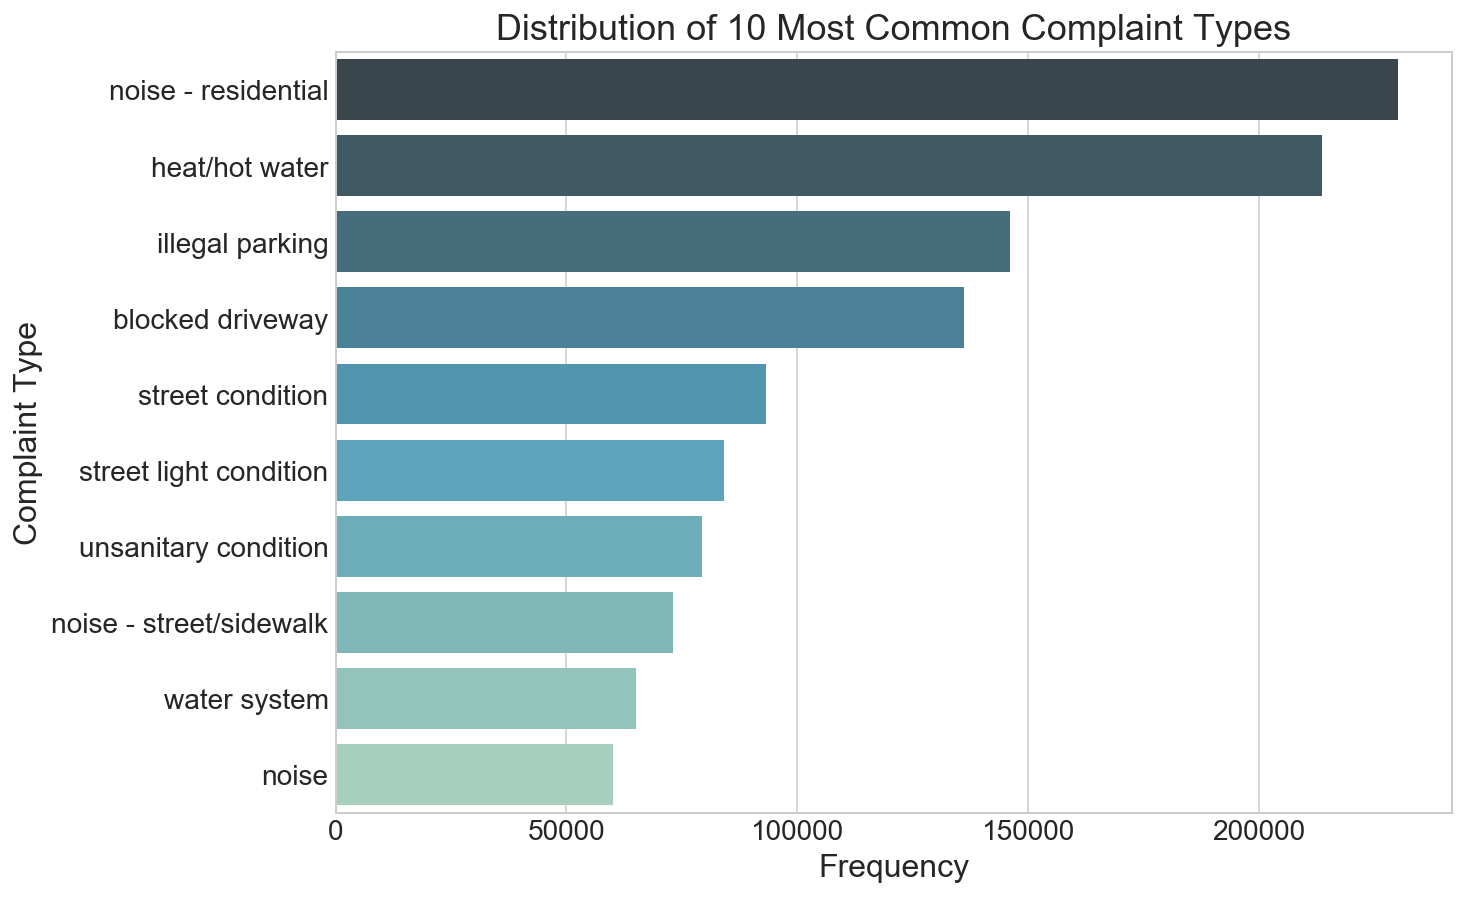

In [49]:
data = df[df['complaint_type'].isin(common_complaints)]

plt.figure(figsize = (10,7))

sns.countplot(y=data['complaint_type'],
              order=data['complaint_type'].value_counts().index,
              palette='GnBu_d')

plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Complaint Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Distribution of 10 Most Common Complaint Types', fontsize=18);

### Consider only the 10 most common overall complaint types.  For the 10 most populous zip codes, how many of each of those 10 types were there in 2017?
---

In [50]:
df.head()

,agency,agency_name,complaint_type,descriptor,location_type,zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,facility_type,status,due_date,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),park_facility_name,park_borough,location,population
0,DSNY,Lot Cleaning,vacant lot,8 Request to Clean Vacant Lot,Lot,11238,NaN,NaN,NaN,NaN,PROSPECT PLACE,WASHINGTON AVENUE,INTERSECTION,BROOKLYN,NaN,Closed,NaN,04/12/2017 12:00:00 PM,08 BROOKLYN,NaN,brooklyn,994366.0,185763.0,Unspecified,BROOKLYN,"40.67654750057022,-73.96352995988079",49262.0
1,DSNY,Lot Cleaning,vacant lot,8 Request to Clean Vacant Lot,Lot,11211,NaN,NaN,NaN,NaN,NORTH 8 STREET,DRIGGS AVENUE,INTERSECTION,BROOKLYN,NaN,Closed,NaN,02/02/2017 12:00:00 PM,01 BROOKLYN,NaN,brooklyn,996490.0,200716.0,Unspecified,BROOKLYN,"40.71758731876742,-73.95584537725969",90117.0
2,DSNY,Lot Cleaning,vacant lot,8 Request to Clean Vacant Lot,Lot,11211,156 HOPE STREET,HOPE STREET,KEAP STREET,BEND,NaN,NaN,ADDRESS,BROOKLYN,NaN,Closed,NaN,03/30/2017 12:00:00 PM,01 BROOKLYN,3.023870e+09,brooklyn,997496.0,198631.0,Unspecified,BROOKLYN,"40.71186304379185,-73.9522204322487",90117.0
3,DSNY,Lot Cleaning,vacant lot,8 Request to Clean Vacant Lot,Lot,10305,36 OLYMPIA BOULEVARD,OLYMPIA BOULEVARD,PIAVE AVENUE,BALFOUR STREET,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Closed,NaN,04/19/2017 12:00:00 PM,02 STATEN ISLAND,5.034010e+09,staten island,964947.0,155255.0,Unspecified,STATEN ISLAND,"40.59279428994732,-74.0695035852305",41749.0
4,DSNY,Lot Cleaning,vacant lot,8 Request to Clean Vacant Lot,Lot,11208,115 SHERIDAN AVENUE,SHERIDAN AVENUE,MC KINLEY AVENUE,LIBERTY AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Closed,NaN,03/10/2017 12:00:00 PM,05 BROOKLYN,3.041820e+09,brooklyn,1021035.0,186952.0,Unspecified,BROOKLYN,"40.67974038452862,-73.86737691477967",94469.0


In [51]:
zips = df[['zip', 'population']].groupby(['zip', 'population']) \
                                .count() \
                                .sort_values(by='population', ascending=False) \
                                .head(10) \
                                .reset_index()
zips = pd.Series.tolist(zips['zip'])

In [52]:
zips

[11368, 11226, 11373, 11220, 11385, 10467, 10025, 11208, 11236, 11207]

In [53]:
common_complaints

Index(['noise - residential', 'heat/hot water', 'illegal parking',
       'blocked driveway', 'street condition', 'street light condition',
       'unsanitary condition', 'noise - street/sidewalk', 'water system',
       'noise'],
      dtype='object', name='complaint_type')

In [54]:
borough_dict = {}
for zip_code in zips:
    print('zip: {}'.format(df[df['zip'] == zip_code]['borough'].unique()))

zip: ['queens']
zip: ['brooklyn']
zip: ['queens']
zip: ['brooklyn']
zip: ['queens']
zip: ['bronx']
zip: ['manhattan']
zip: ['brooklyn']
zip: ['brooklyn']
zip: ['brooklyn']


In [55]:
# data = df[(df['complaint_type'].isin(common_complaints)) & (df['zip'].isin(zips))]

# plt.figure(figsize = (20,20))

# for i, zip_code in enumerate(zips, start=1):
#     plt.subplot(5, 2, i), sns.countplot(y=data[data['zip'] == zip_code]['complaint_type'])
#     plt.xlabel('Frequency', fontsize=16)
#     plt.ylabel('Complaint Type', fontsize=16)
#     plt.xticks(np.arange(1000, 11000, 1000), fontsize=14, rotation=35)
#     plt.yticks(fontsize=14)
#     # add borough
#     plt.title('Distribution of 10 Most Common Complaint Types for Zip ' + str(zip_code) + ' , ' + str(), fontsize=18)
#     plt.tight_layout();

###    Considering all complaint types. Which boroughs are the biggest "complainers" relative to the size of the population in 2017? Meaning, calculate a complaint-index that adjusts for population of the borough.
---

In [56]:
df.head()

,agency,agency_name,complaint_type,descriptor,location_type,zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,facility_type,status,due_date,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),park_facility_name,park_borough,location,population
0,DSNY,Lot Cleaning,vacant lot,8 Request to Clean Vacant Lot,Lot,11238,NaN,NaN,NaN,NaN,PROSPECT PLACE,WASHINGTON AVENUE,INTERSECTION,BROOKLYN,NaN,Closed,NaN,04/12/2017 12:00:00 PM,08 BROOKLYN,NaN,brooklyn,994366.0,185763.0,Unspecified,BROOKLYN,"40.67654750057022,-73.96352995988079",49262.0
1,DSNY,Lot Cleaning,vacant lot,8 Request to Clean Vacant Lot,Lot,11211,NaN,NaN,NaN,NaN,NORTH 8 STREET,DRIGGS AVENUE,INTERSECTION,BROOKLYN,NaN,Closed,NaN,02/02/2017 12:00:00 PM,01 BROOKLYN,NaN,brooklyn,996490.0,200716.0,Unspecified,BROOKLYN,"40.71758731876742,-73.95584537725969",90117.0
2,DSNY,Lot Cleaning,vacant lot,8 Request to Clean Vacant Lot,Lot,11211,156 HOPE STREET,HOPE STREET,KEAP STREET,BEND,NaN,NaN,ADDRESS,BROOKLYN,NaN,Closed,NaN,03/30/2017 12:00:00 PM,01 BROOKLYN,3.023870e+09,brooklyn,997496.0,198631.0,Unspecified,BROOKLYN,"40.71186304379185,-73.9522204322487",90117.0
3,DSNY,Lot Cleaning,vacant lot,8 Request to Clean Vacant Lot,Lot,10305,36 OLYMPIA BOULEVARD,OLYMPIA BOULEVARD,PIAVE AVENUE,BALFOUR STREET,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Closed,NaN,04/19/2017 12:00:00 PM,02 STATEN ISLAND,5.034010e+09,staten island,964947.0,155255.0,Unspecified,STATEN ISLAND,"40.59279428994732,-74.0695035852305",41749.0
4,DSNY,Lot Cleaning,vacant lot,8 Request to Clean Vacant Lot,Lot,11208,115 SHERIDAN AVENUE,SHERIDAN AVENUE,MC KINLEY AVENUE,LIBERTY AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Closed,NaN,03/10/2017 12:00:00 PM,05 BROOKLYN,3.041820e+09,brooklyn,1021035.0,186952.0,Unspecified,BROOKLYN,"40.67974038452862,-73.86737691477967",94469.0
